# Reprojecting foreground maps to CAR

We will load in foreground maps in healpix, spherical harmonic transform them, and inverse spherical harmonic transform them onto a CAR map.

In [1]:
# We load the mapsims library as before
import mapsims
# pixell.enmap is for general map manipulation
# pixell.curvedsky is for SHT-related operations
# pixell.utils is for general utilities; we use it for units
# pixell.enplot lets us make high-resolution visualizations of the map using the Python Image Library
from pixell import enmap, curvedsky as cs, utils, enplot
import numpy as np
# We'll use healpy to do an alm -> cl operation
import healpy as hp
import matplotlib.pyplot as plt
from pathlib import Path


## Load and plot an example healpix foreground simulation

In [2]:
channels = mapsims.parse_channels("tube:ST0")
channel = channels[0][0]
folder = "/project/projectdirs/sobs/v4_sims/mbs/201906_highres_foregrounds_extragalactic_tophat"
filename_template = "{nside}/{content}/{num:04d}/simonsobs_{content}_uKCMB_{telescope}{band}_nside{nside}_{num:04d}.fits"
filename = Path(folder) / filename_template.format(nside=512, content="dust", num=0, 
                                                   telescope=channel.telescope.lower(), band=channel.band)
dmap = hp.read_map(filename,(0,1,2))
print(dmap.shape)

/global/common/software/sobs/mbs/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
(3, 3145728)


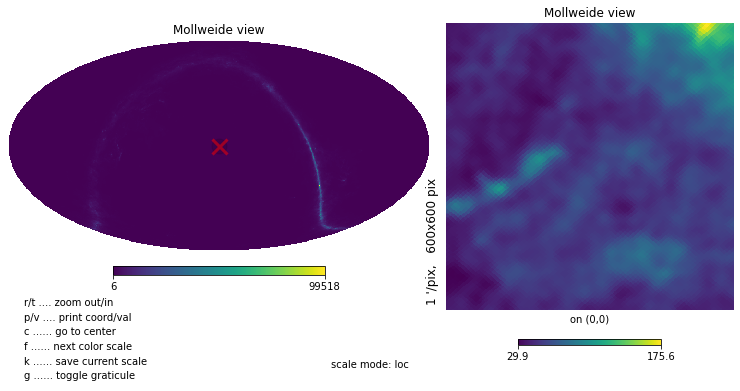

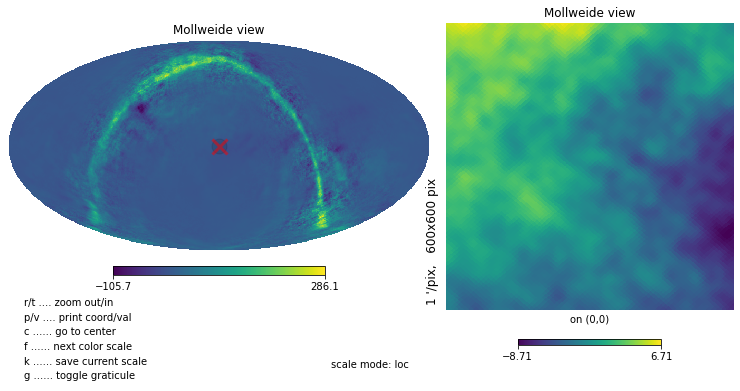

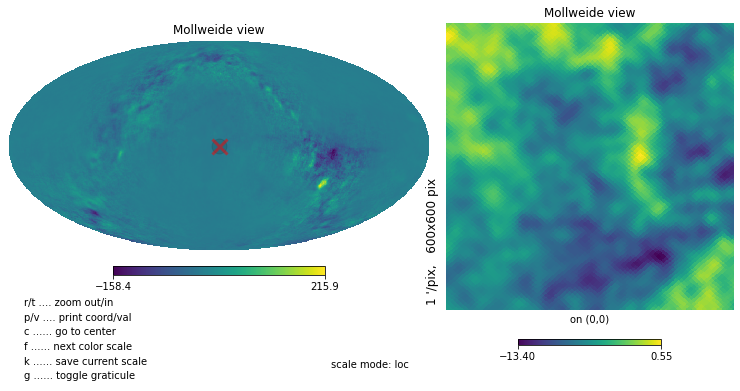

In [3]:
for i in range(3): hp.mollzoom(dmap[i])

## Reproject to CAR and plot

In [4]:
shape,wcs = enmap.fullsky_geometry(res = 16.0 * utils.arcmin)

In [5]:
nside = 512
alm = hp.map2alm(dmap,lmax=2*nside)
omap = cs.alm2map(alm,enmap.empty((3,)+shape,wcs))

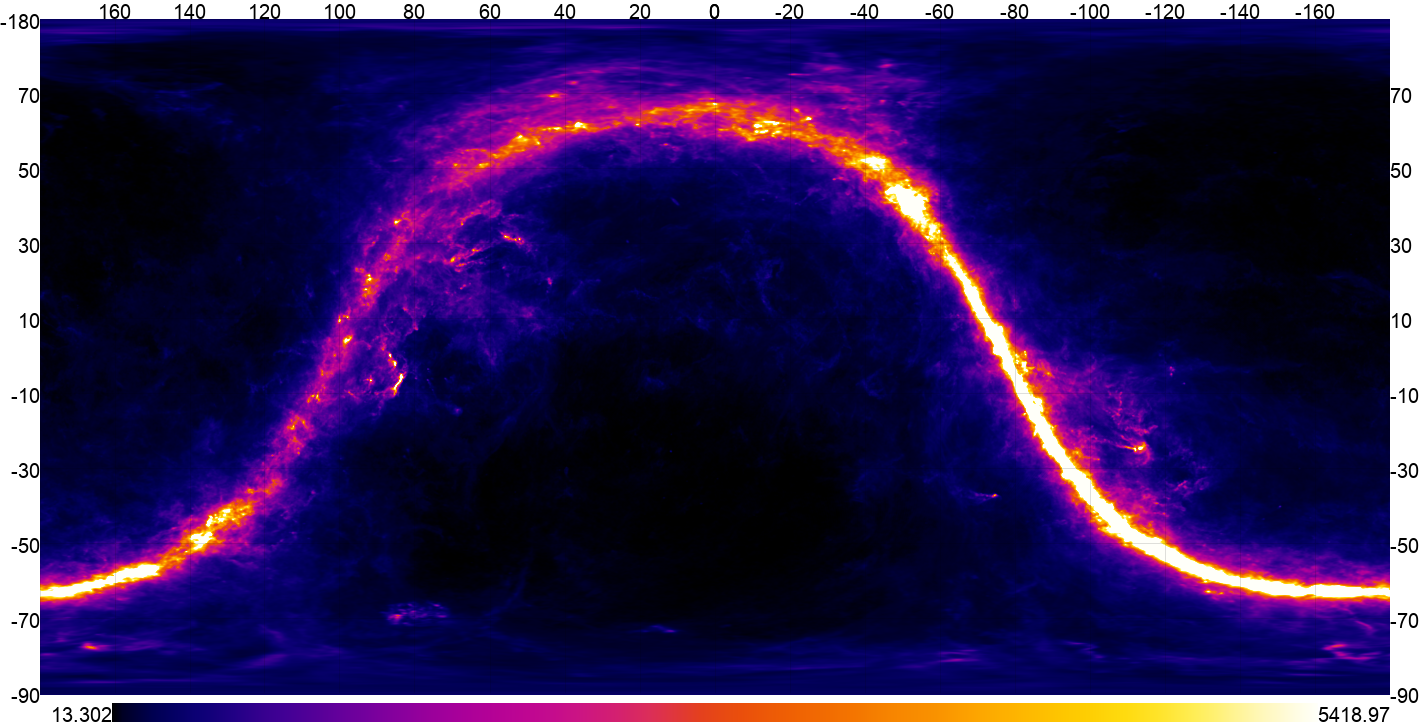

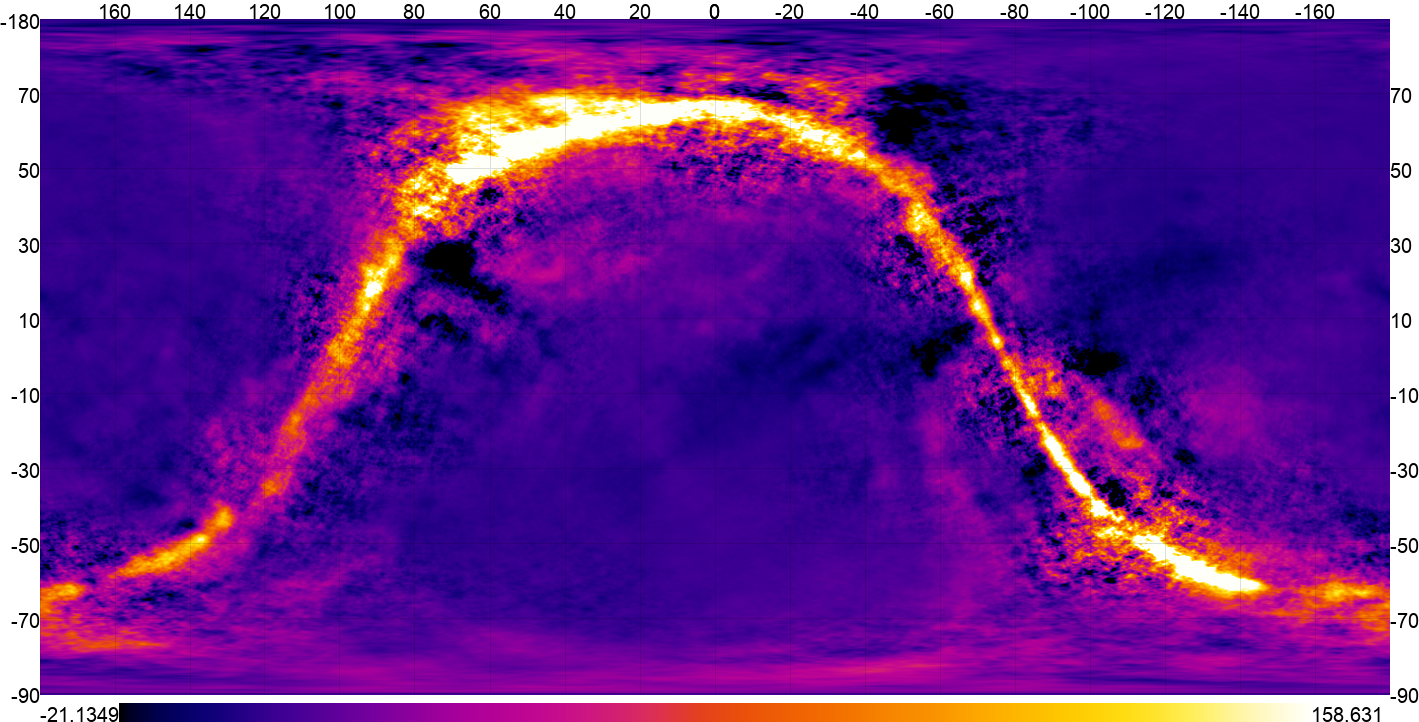

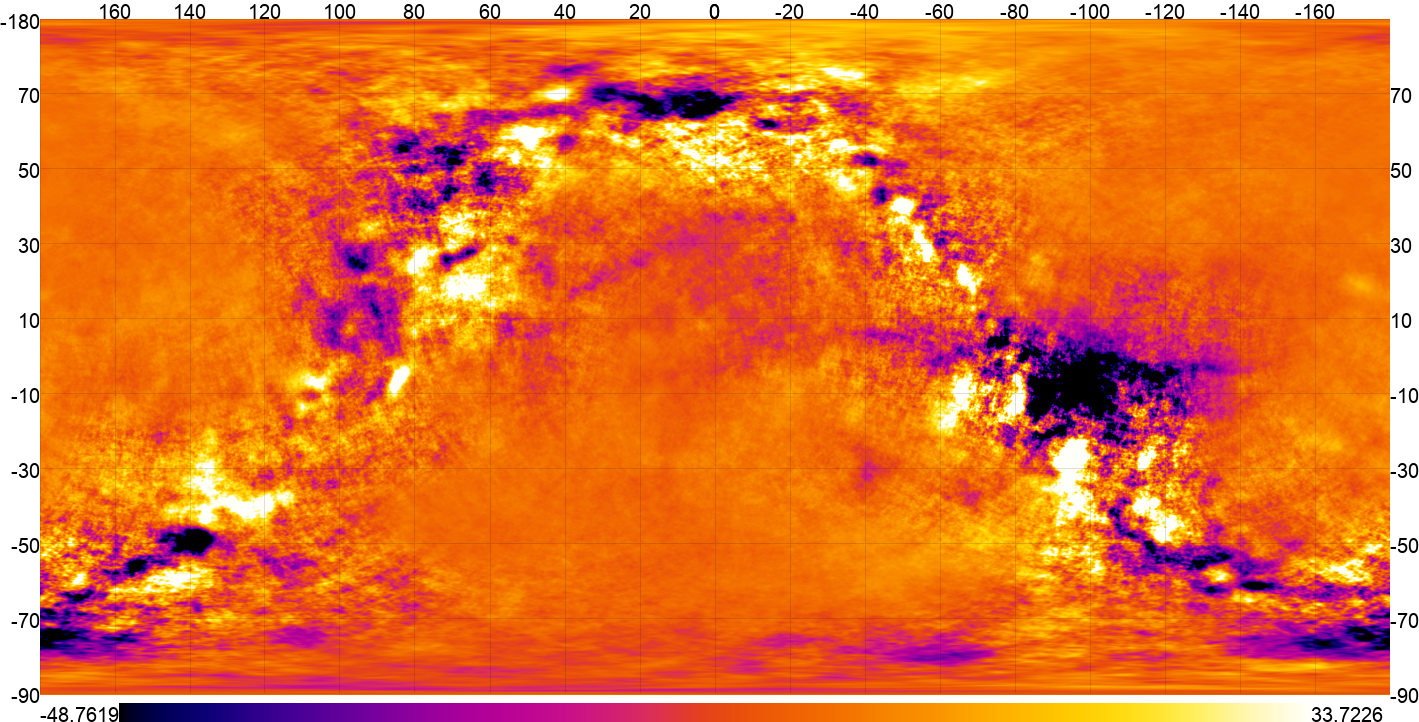

In [6]:
def plot(x,**kwargs): 
    enplot.show(enplot.plot(x,**kwargs))
for i in range(3): plot(omap[i],grid=True,ticks=20,color='iron',colorbar=True)